In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from windrose import plot_windrose
from matplotlib import pyplot as plt
import matplotlib.cm as cm

In [2]:
!ls

AQDM_2142402333.txt		   Fairbanks_winddata.txt  Ozone2016.xlsx
AQDM_2143508020.txt		   FormatReader.ipynb	   PM10_2015.xlsx
codeConversions			   KaitlynTest.ipynb	   PM10_2016.xlsx
Fairbanks_criteria_pollutants.txt  Ozone2015.xlsx


In [74]:
unitsTab = pd.read_csv('codeConversions/units.csv')
unitsTab.index = unitsTab['Unit Code']
unitsDict = unitsTab.to_dict()['Units']

paramsTab = pd.read_csv('codeConversions/parameters.csv')
paramsTab.index = paramsTab['Parameter Code']
paramsDict = paramsTab.to_dict()['Parameter']

In [4]:
def name_pollutant(row):
    try: name = paramsDict[int(row.parameter)]
    except KeyError:
        name = 'Unknown'
    return name

In [5]:
filename = 'Fairbanks_criteria_pollutants.txt'
df_full = pd.read_csv(filename, parse_dates=[3])
df_full.dropna(subset=['datetime'], inplace=True)
df_full.tail()

/home/kaitlyn/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,site,data_status,action_code,datetime,parameter,duration,frequency,value,unit,qc,poc,lat,lon,GISDatum,elev,method_code,mpc,mpc_value,uncertainty,qualifiers
202437,840020900034,1.0,10.0,2016-05-09 16:00:00,42602.0,60.0,0.0,7.7,8.0,0.0,1.0,64.84569,-147.727413,WGS84,132.0,574.0,1.0,0.05,NaN,NaN
202438,840020900034,1.0,10.0,2016-05-18 16:00:00,42602.0,60.0,0.0,2.7,8.0,0.0,1.0,64.84569,-147.727413,WGS84,132.0,574.0,1.0,0.05,NaN,NaN
202439,840020900034,1.0,10.0,2016-05-19 16:00:00,42602.0,60.0,0.0,9.8,8.0,0.0,1.0,64.84569,-147.727413,WGS84,132.0,574.0,1.0,0.05,NaN,NaN
202440,840020900034,1.0,10.0,2016-05-30 16:00:00,42602.0,60.0,0.0,0.2,8.0,0.0,1.0,64.84569,-147.727413,WGS84,132.0,574.0,1.0,0.05,NaN,NaN
202441,840020900034,1.0,10.0,2016-06-02 16:00:00,42602.0,60.0,0.0,4.8,8.0,0.0,1.0,64.84569,-147.727413,WGS84,132.0,574.0,1.0,0.05,NaN,NaN


In [6]:
df_full['pollutant'] = df_full.apply(name_pollutant, axis=1)

In [7]:
df_full.pollutant

0                          Ozone
1                          Ozone
2                          Ozone
3                          Ozone
4                          Ozone
5                          Ozone
6                          Ozone
7                          Ozone
8                          Ozone
9                          Ozone
10                         Ozone
11                         Ozone
12                         Ozone
13                         Ozone
14                         Ozone
15                         Ozone
16                         Ozone
17                         Ozone
18                         Ozone
19                         Ozone
20                         Ozone
21                         Ozone
22                         Ozone
23                         Ozone
24                         Ozone
25                         Ozone
26                         Ozone
27                         Ozone
28                         Ozone
29                         Ozone
          

In [8]:
paramsDict[81102]

'PM10 Total 0-10um STP'

In [9]:
df_pm = df_full.loc[df_full.parameter > 80000]

In [10]:
df_pm.parameter.describe()
df_pm.index = df_pm.datetime
df_pm.sort_index(inplace = True)

/home/kaitlyn/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


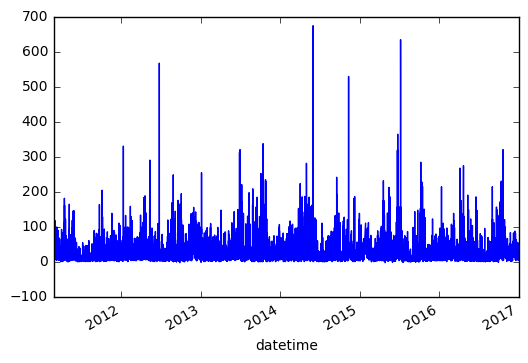

In [11]:
df_pm.value.plot()

/home/kaitlyn/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


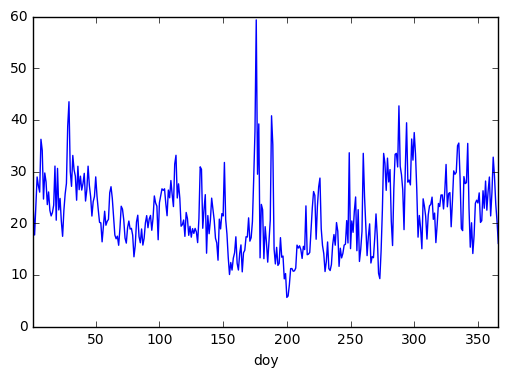

In [12]:
df_pm['doy'] = df_pm.index.dayofyear
annual_mean = df_pm.groupby('doy').value.mean()
annual_mean.plot()

/home/kaitlyn/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


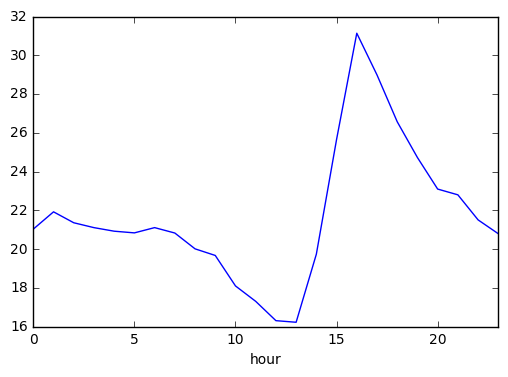

In [13]:
df_pm['hour'] = df_pm.index.hour
hourly_mean = df_pm.groupby('hour').value.mean()
hourly_mean.plot()

In [14]:
def makeSeason(row):
    month = row['month']
    if month in [11,12,1,2]:
        return 'Winter'
    elif month in [5,6,7,8]:
        return 'Summer'
    elif month in [3,4]:
        return 'Spring'
    elif month in [9,10]:
        return 'Fall'
    
def replace(group):
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > 2*std
    group[outliers] = mean        # or "group[~outliers].mean()"
    return group

In [15]:
df_pm['month'] = df_pm.index.month
df_pm['season'] = df_pm.apply(makeSeason, axis=1)
df_pm['filtVal'] = df_pm.groupby('season').value.transform(replace)

/home/kaitlyn/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/kaitlyn/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/kaitlyn/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [16]:
winter = df_pm.loc[df_pm.season == 'Winter']
winter_daily = winter.groupby('hour').filtVal.mean()

spring = df_pm.loc[df_pm.season == 'Spring']
spring_daily = spring.groupby('hour').filtVal.mean()

summer = df_pm.loc[df_pm.season == 'Summer']
summer_daily = summer.groupby('hour').filtVal.mean()

fall = df_pm.loc[df_pm.season == 'Fall']
fall_daily = fall.groupby('hour').filtVal.mean()

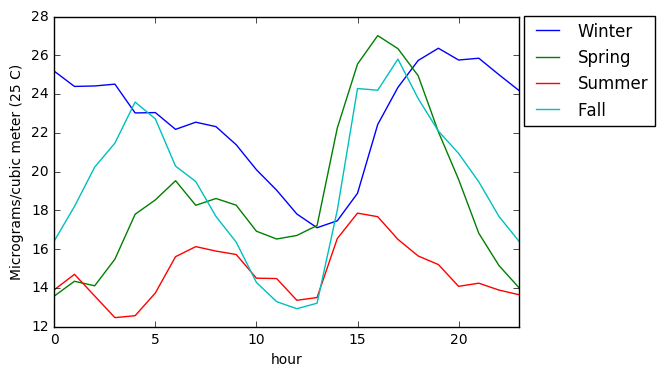

In [17]:
y_label = unitsDict[winter.unit[0]]
plt.figure()
winter_daily.plot(label='Winter')
spring_daily.plot(label='Spring')
summer_daily.plot(label='Summer')
fall_daily.plot(label='Fall') 
plt.ylabel(y_label)
plt.legend(bbox_to_anchor=(1.31, 1.03))
#plt.legend()

In [18]:
!ls

AQDM_2142402333.txt		   Fairbanks_winddata.txt  Ozone2016.xlsx
AQDM_2143508020.txt		   FormatReader.ipynb	   PM10_2015.xlsx
codeConversions			   KaitlynTest.ipynb	   PM10_2016.xlsx
Fairbanks_criteria_pollutants.txt  Ozone2015.xlsx


In [19]:
filename2 = 'Fairbanks_winddata.txt'
df2 = pd.read_csv(filename2, parse_dates=[3])
df2.dropna(subset=['datetime'], inplace=True)
df2.tail()

/home/kaitlyn/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,site,data_status,action_code,datetime,parameter,duration,frequency,value,unit,qc,poc,lat,lon,GISDatum,elev,method_code,mpc,mpc_value,uncertainty,qualifiers
384452,840020900034,1.0,10.0,2016-07-03 22:00:00,42602.0,60.0,0.0,0.6,8.0,0.0,1.0,64.84569,-147.727413,WGS84,132.0,574.0,1.0,0.05,NaN,NaN
384453,840020900034,1.0,10.0,2016-07-13 22:00:00,42602.0,60.0,0.0,1.9,8.0,0.0,1.0,64.84569,-147.727413,WGS84,132.0,574.0,1.0,0.05,NaN,NaN
384454,840020900034,1.0,10.0,2016-07-20 22:00:00,42602.0,60.0,0.0,0.3,8.0,0.0,1.0,64.84569,-147.727413,WGS84,132.0,574.0,1.0,0.05,NaN,NaN
384455,840020900034,1.0,10.0,2016-09-12 22:00:00,42602.0,60.0,0.0,8.8,8.0,0.0,1.0,64.84569,-147.727413,WGS84,132.0,574.0,1.0,0.05,NaN,NaN
384456,840020900034,1.0,10.0,2016-09-20 22:00:00,42602.0,60.0,0.0,11.9,8.0,0.0,1.0,64.84569,-147.727413,WGS84,132.0,574.0,1.0,0.05,NaN,NaN


In [20]:
df2.index = df2.datetime
df2.sort_index(inplace=True)

df2['doy'] = df2.index.dayofyear
df2['hour'] = df2.index.hour
df2['month'] = df2.index.month
df2['season'] = df2.apply(makeSeason, axis=1)

In [21]:
paramsList = []
for i, row in df2.iterrows():
    if row.parameter not in paramsList:
        paramsList.append(row.parameter)

In [22]:
for item in paramsList:
    print(str(item)+": "+paramsDict[item])

62101.0: Outdoor Temperature
42600.0: Reactive oxides of nitrogen (NOy)
61103.0: Wind Speed - Resultant
42101.0: Carbon monoxide
88502.0: Acceptable PM2.5 AQI & Speciation Mass
85101.0: PM10 - LC
88501.0: PM2.5 Raw Data
62201.0: Relative Humidity 
42401.0: Sulfur dioxide
86101.0: PM10-2.5 - Local Conditions
81102.0: PM10 Total 0-10um STP
61104.0: Wind Direction - Resultant
44201.0: Ozone
42601.0: Nitric oxide (NO)
42612.0: NOy - NO
64101.0: Barometric pressure
42602.0: Nitrogen dioxide (NO2)
42603.0: Oxides of nitrogen (NOx)


In [23]:
df_pm25 = df2.loc[df2.parameter == 88501]

In [24]:
df_pm25.index = df_pm25.datetime
df_pm25.sort_index(inplace=True)

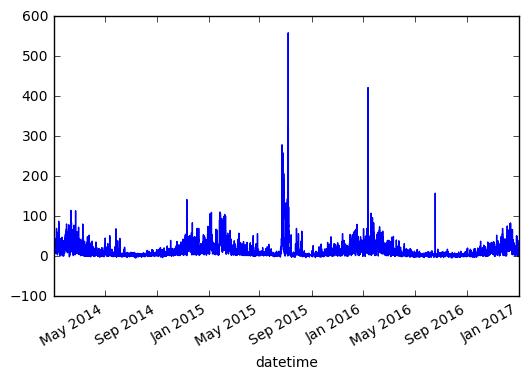

In [25]:
df_pm25.value.plot()

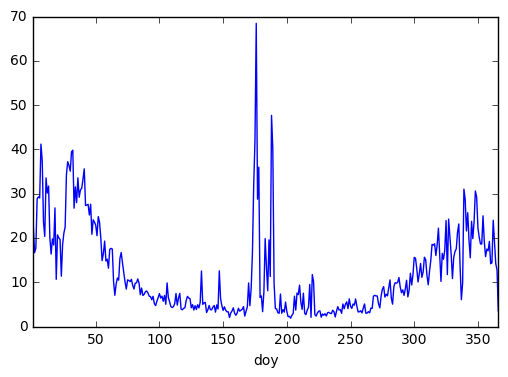

In [26]:
annual_mean = df_pm25.groupby('doy').value.mean()
annual_mean.plot()

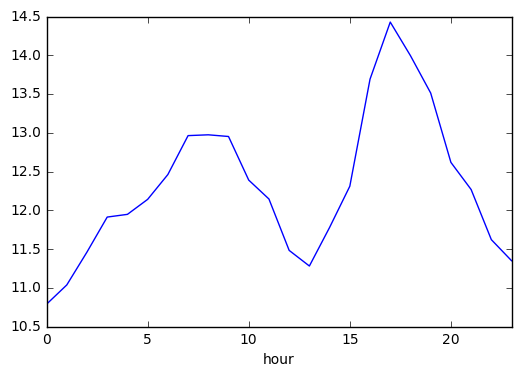

In [27]:
hourly_mean = df_pm25.groupby('hour').value.mean()
hourly_mean.plot()

In [28]:
df_pm25['filtVal'] = df_pm25.groupby('season').value.transform(replace)

/home/kaitlyn/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
winter = df_pm25.loc[df_pm25.season == 'Winter']
winter_daily = winter.groupby('hour').filtVal.mean()

spring = df_pm25.loc[df_pm25.season == 'Spring']
spring_daily = spring.groupby('hour').filtVal.mean()

summer = df_pm25.loc[df_pm25.season == 'Summer']
summer_daily = summer.groupby('hour').filtVal.mean()

fall = df_pm25.loc[df_pm25.season == 'Fall']
fall_daily = fall.groupby('hour').filtVal.mean()

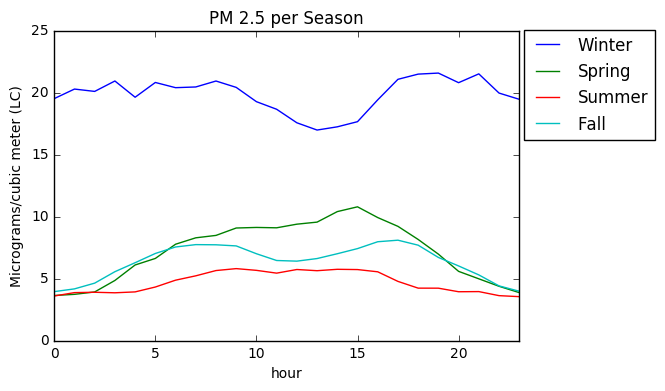

In [100]:
y_label = unitsDict[winter.unit[0]]
plt.figure()
winter_daily.plot(label='Winter')
spring_daily.plot(label='Spring')
summer_daily.plot(label='Summer')
fall_daily.plot(label='Fall') 
plt.title("PM 2.5 per Season")
plt.ylabel(y_label)
plt.legend(bbox_to_anchor=(1.31, 1.03))
#plt.legend()

61103.0: Wind Speed - Resultant
61104.0: Wind Direction - Resultant

In [118]:
dfwSpeed = df2.loc[df2.parameter == 61103]
dfwDir = df2.loc[df2.parameter == 61104]
df_co = df2.loc[df2.parameter == 42101]
df_nox = df2.loc[df2.parameter == 42603]
df_pm10 = df2.loc[df2.parameter == 81102]
df_temp = df2.loc[df2.parameter == 62101]

In [95]:
df_wind = pd.DataFrame({'speed': dfwSpeed.value, 'direction': dfwDir.value, 'pm25': df_pm25.filtVal})
df_wind.index = df_wind.speed

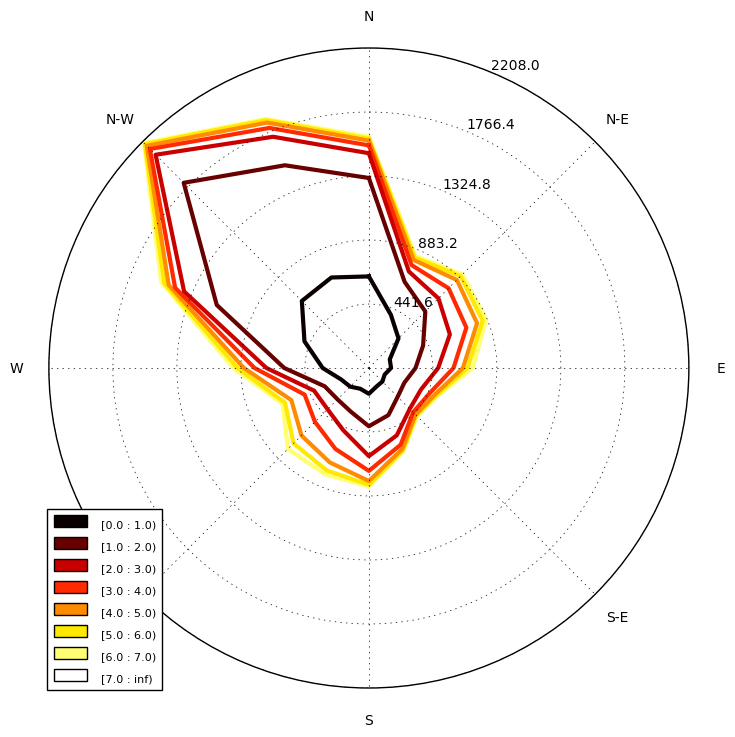

In [96]:
plot_windrose(df_wind, kind='contour', bins=np.arange(0.01,8,1), cmap=cm.hot, lw=3)

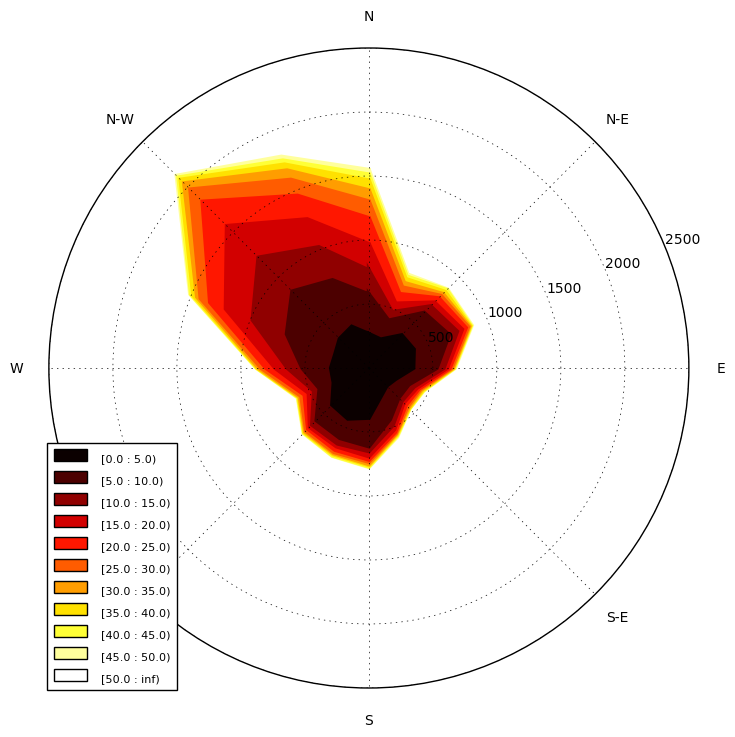

In [97]:
plot_windrose(df_wind, var_name = 'pm25', kind='contourf', bins=np.arange(0.01,55,5), cmap=cm.hot, lw=3)

In [34]:
df_wind.describe()

/home/kaitlyn/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,direction,speed
count,16746.000000,16745.000000
mean,202.086289,2.052529
std,117.448975,1.638325
min,0.000000,0.000000
25%,87.000000,NaN
50%,225.000000,NaN
75%,310.000000,NaN
max,360.000000,15.000000


In [37]:
df_wind.tail()

,direction,speed
datetime,,
2016-03-01 04:00:00,283.0,2.7
2016-03-01 05:00:00,283.0,2.1
2016-03-01 06:00:00,293.0,1.2
2016-03-01 07:00:00,298.0,1.6
2016-03-01 08:00:00,326.0,0.4


In [69]:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4385435/ and psccleanair.org as sources

wood_stove_emissions = (winter_daily - summer_daily)
epa_cert_co = (.2*97)/(.8*244) # 20% households have certified stoves
                        
with_approved_stoves = (wood_stove_emissions* (1-epa_cert_co)) * (97/244) +  summer_daily

In [70]:
epa_cert_co = (.2*97)/(.8*244) # 20% households have certified stoves

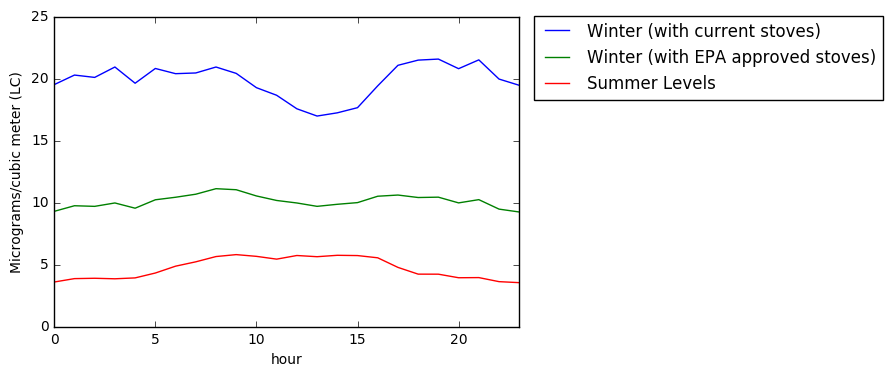

In [78]:
plt.figure()
winter_daily.plot(label='Winter (with current stoves)')
with_approved_stoves.plot(label = 'Winter (with EPA approved stoves)')
summer_daily.plot(label = 'Summer Levels')
y_label = unitsDict[winter.unit[0]]
plt.ylabel(y_label)
plt.legend(bbox_to_anchor=(1.8, 1.03))

In [66]:
.332 *.8

0.2656

In [67]:
(.2*97)/(.8*244)

0.09938524590163934

In [90]:
df_pm25.filtVal.describe()

count    25322.000000
mean        10.513186
std         10.501827
min         -5.000000
25%          3.000000
50%          7.000000
75%         15.000000
max         53.000000
Name: filtVal, dtype: float64

In [120]:
df_co.index = df_co.datetime
df_co.sort_index(inplace=True)
df_co['filtVal'] = df_co.groupby('season').value.transform(replace)

winter_co = df_co.loc[df_co.season == 'Winter']
winter_daily_co = winter_co.groupby('hour').filtVal.mean()

spring_co = df_co.loc[df_co.season == 'Spring']
spring_daily_co = spring_co.groupby('hour').filtVal.mean()

summer_co = df_co.loc[df_co.season == 'Summer']
summer_daily_co = summer_co.groupby('hour').filtVal.mean()

fall_co = df_co.loc[df_co.season == 'Fall']
fall_daily_co = fall_co.groupby('hour').filtVal.mean()

/home/kaitlyn/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


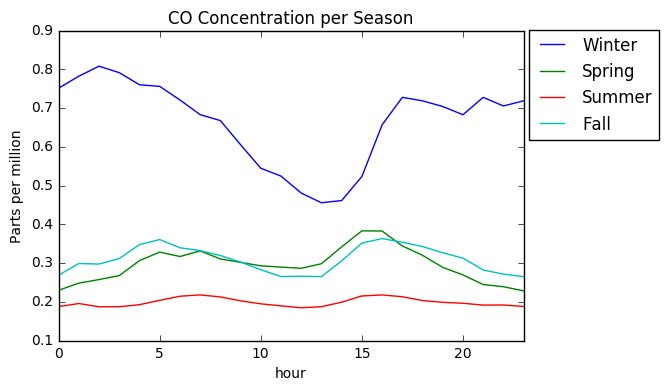

In [101]:
y_label = unitsDict[winter_co.unit[0]]
plt.figure()
winter_daily_co.plot(label='Winter')
spring_daily_co.plot(label='Spring')
summer_daily_co.plot(label='Summer')
fall_daily_co.plot(label='Fall') 
plt.title("CO Concentration per Season")
plt.ylabel(y_label)
plt.legend(bbox_to_anchor=(1.31, 1.03))

In [103]:
winter_co.index

DatetimeIndex(['2014-01-01 09:00:00', '2014-01-01 10:00:00',
               '2014-01-01 11:00:00', '2014-01-01 12:00:00',
               '2014-01-01 13:00:00', '2014-01-01 14:00:00',
               '2014-01-01 15:00:00', '2014-01-01 16:00:00',
               '2014-01-01 17:00:00', '2014-01-01 18:00:00',
               ...
               '2016-12-31 23:00:00', '2017-01-01 00:00:00',
               '2017-01-01 01:00:00', '2017-01-01 02:00:00',
               '2017-01-01 03:00:00', '2017-01-01 04:00:00',
               '2017-01-01 05:00:00', '2017-01-01 06:00:00',
               '2017-01-01 07:00:00', '2017-01-01 08:00:00'],
              dtype='datetime64[ns]', name='datetime', length=7875, freq=None)

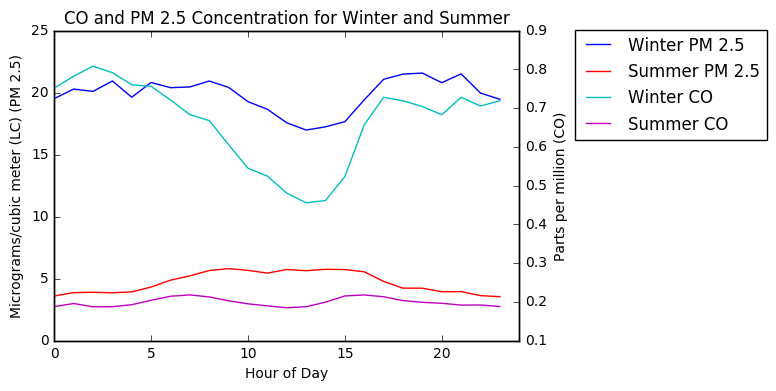

In [117]:
y_label_pm = unitsDict[winter.unit[0]]
y_label_co = unitsDict[winter_co.unit[0]]

fig, ax1 = plt.subplots()

pm_w = ax1.plot(winter_daily.index, winter_daily, 'b-', label = 'Winter PM 2.5')
pm_s = ax1.plot(summer_daily.index, summer_daily, 'r-', label = 'Summer PM 2.5')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel(y_label_pm + ' (PM 2.5)')

ax2 = ax1.twinx()
#winter_daily_co.plot(label='Winter CO')
#summer_daily_co.plot(label='Summer CO')
co_w = ax2.plot(winter_daily_co.index, winter_daily_co, 'c-', label = 'Winter CO')
co_s = ax2.plot(summer_daily_co.index, summer_daily_co, 'm-', label = 'Summer CO')
ax2.set_ylabel(y_label_co + ' (CO)')

lns = pm_w+ pm_s + co_w + co_s
labs = [l.get_label() for l in lns]
ax1.set_xlim(0, 24)
ax2.set_xlim(0,24)
plt.legend(lns, labs, bbox_to_anchor=(1.55, 1.03))

plt.title("CO and PM 2.5 Concentration for Winter and Summer")
#plt.legend(bbox_to_anchor=(1.5, 1.03))

Theta, R = np.meshgrid(df_wind.direction, df_wind.speed)
C = np.sinc(Theta-2)+(5-np.sqrt(R))+np.random.rand(len(r),len(theta))
C = np.ma.masked_less_equal(C,2)

fig, ax = plt.subplots(subplot_kw={"projection":"polar"})

ax.pcolormesh(Theta, R, C, vmin=2, vmax=5)

plt.show()

In [119]:
df_pm10.index = df_pm10.datetime
df_pm10.sort_index(inplace=True)

df_nox.index = df_nox.datetime
df_nox.sort_index(inplace=True)

df_co.index = df_co.datetime
df_co.sort_index(inplace=True)

dfwSpeed.index = dfwSpeed.datetime
dfwSpeed.sort_index(inplace=True)

dfwDir.index = dfwDir.datetime
dfwSpeed.sort_index(inplace = True)

In [121]:
d = {'date':df_pm25.datetime, 'ws': dfwSpeed.value, 'wd': dfwDir.value,
    'pm25':df_pm25.filtVal, 'co':df_co.filtVal, 'nox':df_nox.value,
    'pm10':df_pm10.value}

df_to_save = pd.DataFrame(data = d)

In [123]:
df_to_save.head()

,co,date,nox,pm10,pm25,wd,ws
datetime,,,,,,,
2014-01-01 09:00:00,0.64,2014-01-01 09:00:00,NaN,29.0,34.000000,328.0,1.0
2014-01-01 10:00:00,0.79,2014-01-01 10:00:00,NaN,53.0,21.663548,345.0,0.8
2014-01-01 11:00:00,0.69,2014-01-01 11:00:00,NaN,39.0,40.000000,291.0,1.0
2014-01-01 12:00:00,0.59,2014-01-01 12:00:00,NaN,40.0,40.000000,273.0,1.4
2014-01-01 13:00:00,0.54,2014-01-01 13:00:00,NaN,33.0,35.000000,349.0,1.0


In [124]:
df_to_save.dropna(subset=['wd'], inplace=True)
df_to_save.dropna(subset=['ws'], inplace=True)
df_to_save.tail()

,co,date,nox,pm10,pm25,wd,ws
datetime,,,,,,,
2016-03-01 04:00:00,0.331978,2016-03-01 04:00:00,56.4,19.0,11.0,283.0,2.7
2016-03-01 05:00:00,0.600000,2016-03-01 05:00:00,43.5,15.0,10.0,283.0,2.1
2016-03-01 06:00:00,0.650000,2016-03-01 06:00:00,44.8,13.0,11.0,293.0,1.2
2016-03-01 07:00:00,0.620000,2016-03-01 07:00:00,37.4,11.0,11.0,298.0,1.6
2016-03-01 08:00:00,0.560000,2016-03-01 08:00:00,40.2,9.0,9.0,326.0,0.4


In [127]:
df_to_save.shape

(16745, 7)

In [128]:
df_to_save.to_csv("fairbanks_windrose_data.csv", columns = ['date', 'ws','wd','pm25','co','nox','pm10'])

In [131]:
df_nox

,site,data_status,action_code,datetime,parameter,duration,frequency,value,unit,qc,...,method_code,mpc,mpc_value,uncertainty,qualifiers,doy,hour,month,season,filtVal
datetime,,,,,,,,,,,,,,,,,,,,,
2014-07-01 12:00:00,840020900034,0.0,10.0,2014-07-01 12:00:00,42603.0,60.0,0.0,0.9,8.0,0.0,...,574.0,1.0,0.05,NaN,NaN,182,12,7,Summer,0.9
2014-07-01 13:00:00,840020900034,0.0,10.0,2014-07-01 13:00:00,42603.0,60.0,0.0,1.2,8.0,0.0,...,574.0,1.0,0.05,NaN,NaN,182,13,7,Summer,1.2
2014-07-01 14:00:00,840020900034,0.0,10.0,2014-07-01 14:00:00,42603.0,60.0,0.0,2.2,8.0,0.0,...,574.0,1.0,0.05,NaN,NaN,182,14,7,Summer,2.2
2014-07-01 15:00:00,840020900034,0.0,10.0,2014-07-01 15:00:00,42603.0,60.0,0.0,4.1,8.0,0.0,...,574.0,1.0,0.05,NaN,NaN,182,15,7,Summer,4.1
2014-07-01 16:00:00,840020900034,0.0,10.0,2014-07-01 16:00:00,42603.0,60.0,0.0,5.0,8.0,0.0,...,574.0,1.0,0.05,NaN,NaN,182,16,7,Summer,5.0
2014-07-01 17:00:00,840020900034,0.0,10.0,2014-07-01 17:00:00,42603.0,60.0,0.0,4.8,8.0,0.0,...,574.0,1.0,0.05,NaN,NaN,182,17,7,Summer,4.8
2014-07-01 18:00:00,840020900034,0.0,10.0,2014-07-01 18:00:00,42603.0,60.0,0.0,6.4,8.0,0.0,...,574.0,1.0,0.05,NaN,NaN,182,18,7,Summer,6.4
2014-07-01 19:00:00,840020900034,0.0,10.0,2014-07-01 19:00:00,42603.0,60.0,0.0,4.5,8.0,0.0,...,574.0,1.0,0.05,NaN,NaN,182,19,7,Summer,4.5
2014-07-01 20:00:00,840020900034,0.0,10.0,2014-07-01 20:00:00,42603.0,60.0,0.0,3.6,8.0,0.0,...,574.0,1.0,0.05,NaN,NaN,182,20,7,Summer,3.6


In [132]:
df_nox['filtVal'] = df_nox.groupby('season').value.transform(replace)

winter_nox = df_nox.loc[df_nox.season == 'Winter']
winter_daily_nox = winter_nox.groupby('hour').filtVal.mean()

#spring_nox = df_nox.loc[df_nox.season == 'Spring']
#spring_daily_nox = spring_nox.groupby('hour').filtVal.mean()

summer_nox = df_nox.loc[df_nox.season == 'Summer']
summer_daily_nox = summer_nox.groupby('hour').filtVal.mean()

#fall_nox = df_nox.loc[df_co.season == 'Fall']
#fall_daily_nox = fall_nox.groupby('hour').filtVal.mean()

/home/kaitlyn/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


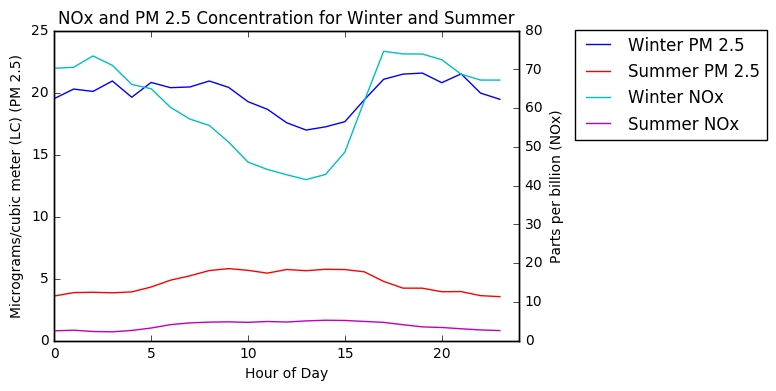

In [136]:
y_label_pm = unitsDict[winter.unit[0]]
y_label_nox = unitsDict[winter_nox.unit[0]]

fig, ax1 = plt.subplots()

pm_w = ax1.plot(winter_daily.index, winter_daily, 'b-', label = 'Winter PM 2.5')
pm_s = ax1.plot(summer_daily.index, summer_daily, 'r-', label = 'Summer PM 2.5')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel(y_label_pm + ' (PM 2.5)')

ax2 = ax1.twinx()
#winter_daily_co.plot(label='Winter CO')
#summer_daily_co.plot(label='Summer CO')
nox_w = ax2.plot(winter_daily_nox.index, winter_daily_nox, 'c-', label = 'Winter NOx')
nox_s = ax2.plot(summer_daily_nox.index, summer_daily_nox, 'm-', label = 'Summer NOx')
#co_w = ax2.plot(winter_daily_co.index, winter_daily_co, 'g-', label = 'Winter CO')
#co_s = ax2.plot(summer_daily_co.index, summer_daily_co, 'b-', label = 'Summer CO')
ax2.set_ylabel(y_label_nox + ' (NOx)')

lns = pm_w+ pm_s + nox_w + nox_s# + co_w + co_s
labs = [l.get_label() for l in lns]
ax1.set_xlim(0, 24)
ax2.set_xlim(0,24)
plt.legend(lns, labs, bbox_to_anchor=(1.55, 1.03))

plt.title("NOx and PM 2.5 Concentration for Winter and Summer")